In [253]:
#!pip install seaborn

In [16]:
## import pytorch_lightning as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
from disent.data.groundtruth import XYSquaresClusterData
from disent.dataset.groundtruth import GroundTruthDataset
from disent.data.groundtruth.base import GroundTruthData
from disent.transform import ToStandardisedTensor
data: GroundTruthData = XYSquaresClusterData()
dataset: Dataset = GroundTruthDataset(data, transform=ToStandardisedTensor())
dataloader = DataLoader(dataset=dataset, batch_size=67, shuffle=False)
images=next(iter(dataloader))['x_targ'][-1]
img = images[0]
#grid_img = torchvision.utils.make_grid(images,pad_value=1, ncol=4)

[1.]


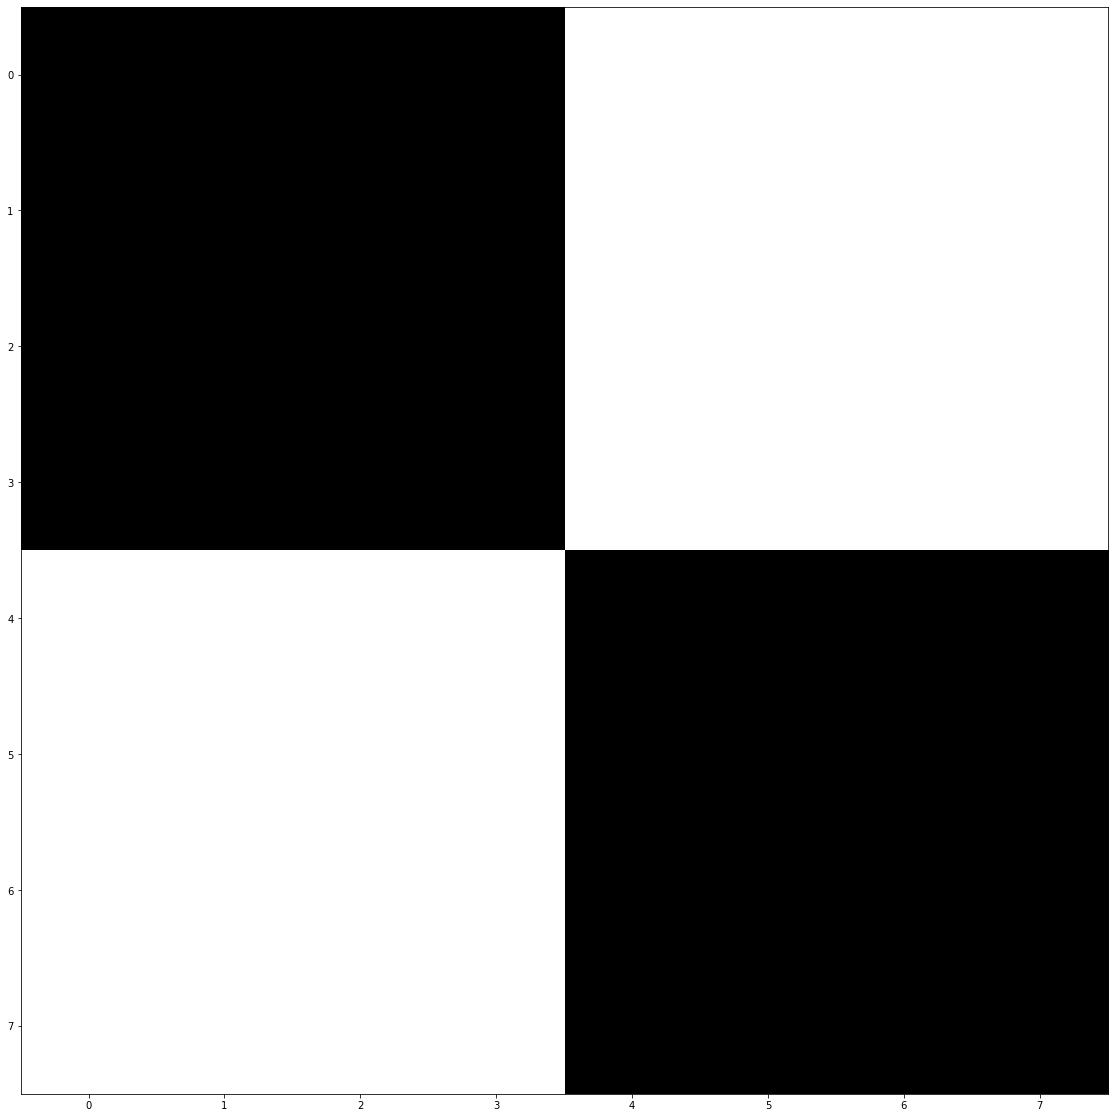

In [42]:
cluster2 = np.ones((8,8,1))
cluster2[:4,4:]=0
cluster2[4:,:4]=0
#cluster2[4:,4:]=1
#cluster2[:4,:4]=1
#base = np.zeros((8,8,1))*255
plt.imshow(cluster2,cmap='gray')
print(cluster2[0,0])
cluster2 = np.ones((8,8,1)) - cluster2
plt.imshow(cluster2,cmap='gray')

Accent


/tmp/ipykernel_112546/1854707142.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(f1.get_xticklabels(), Fontsize=20)
/tmp/ipykernel_112546/1854707142.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(f1.get_yticklabels(), Fontsize=20)


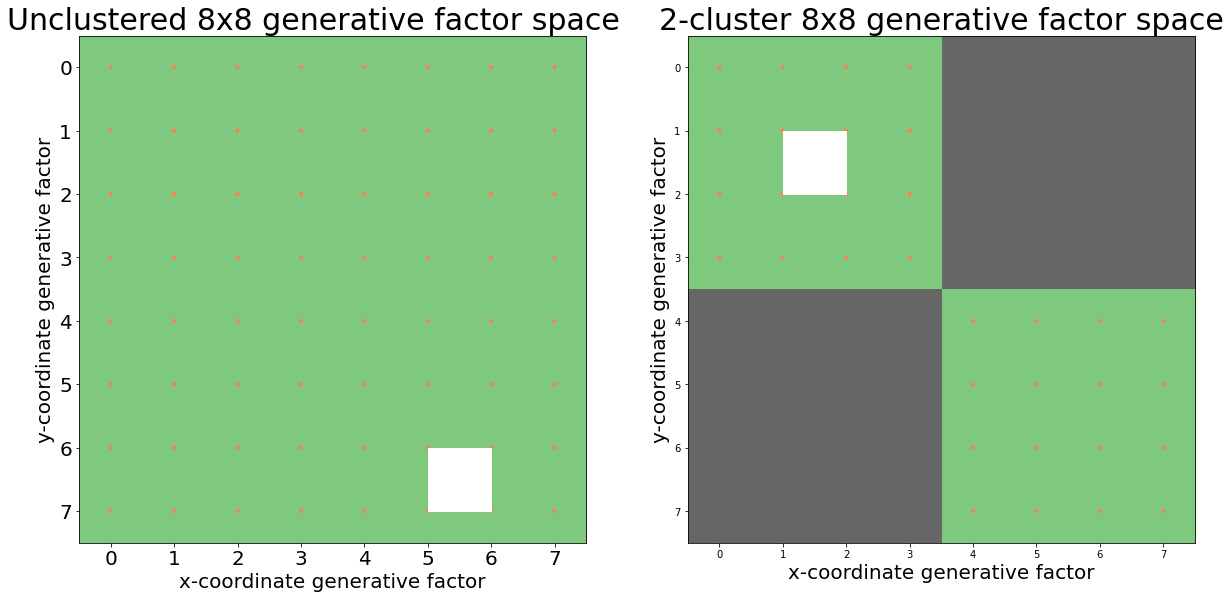

In [47]:
cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

CMAP = cmap_list[0]
print(CMAP)

plt.rcParams["figure.figsize"] = (20,20)
f = plt.figure()
f.fontsize=30
f1 = f.add_subplot(1,2, 1)
plt.setp(f1.get_xticklabels(), Fontsize=20)
plt.setp(f1.get_yticklabels(), Fontsize=20)
f1.set_title('Unclustered 8x8 generative factor space    ', size=30) 
f1.set_xlabel('x-coordinate generative factor', fontsize=20)
f1.set_ylabel('y-coordinate generative factor',  fontsize=20)
for xx in range(0,8):
    for yy in range(0,8):
        circ = Circle((xx,yy),0.025, color='coral')
        f1.add_patch(circ)

sprite = Rectangle((5,6), 1,1, color='white')
f1.add_patch(sprite)

plt.imshow(np.ones(cluster2.shape), cmap =CMAP)

###################################

f2 = f.add_subplot(1,2, 2)
f2.set_title('2-cluster 8x8 generative factor space', size=30)
#plt.setp(f2.get_xticklabels(), Fontsize=16)
#plt.setp(f2.get_yticklabels(), Fontsize=16)
f2.set_xlabel('x-coordinate generative factor',  fontsize=20)
f2.set_ylabel('y-coordinate generative factor', fontsize=20)

for xx in range(0,4):
    for yy in range(0,4):
        circ = Circle((xx,yy),0.025, color='coral')
        f2.add_patch(circ)

for xx in range(4,8):
    for yy in range(4,8):
        circ = Circle((xx,yy),0.025, color='coral')
        f2.add_patch(circ)
        
sprite = Rectangle((1,1), 1,1, color='white')
f2.add_patch(sprite)

plt.imshow(cluster2, cmap =CMAP)

plt.show(block=True)
f.savefig('factor_clusters.png')

In [220]:
x = range(0,4)

In [221]:
x

range(0, 4)